# Week 10
# Analyze New York Taxi Trips
Today let's look at an actual data analysis challenge: analyzing NYC taxi trip durations. This was originally a competition on Kaggle in 2017.

## Data
The data is available [here](https://www.kaggle.com/c/nyc-taxi-trip-duration/data).
- Read the description of the data set.
- Download `train.zip`

In [ ]:
# Download and unzip the data files
import zipfile
file_name = "Data/train.zip" # This is an example of a relative path.
# The following line is an example of a absolute path
# file_name = "C:/Users/lzhao/Dropbox (Lehman College)/CMP464788Fall2021_DataHandlingAndAnalysis"
f = zipfile.ZipFile(file_name, "r")
f.printdir() # display the content
f.extractall("Data/nyctaxi")
f.close()

# Get to know the data
The first step of data analysis is usually to collect overall information of the data sets:
- Is the data set properly loaded?
- What is the size of the data set?
- What features are available? 
- What does each feature represent?
- Which features are relavent to this project?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
# Load the training data set
raw_data = pd.read_csv("Data/nyctaxi/train.csv", sep=',') # USE YOUR OWN FILE NAME AND FILE PATH HERE
raw_data.head()

In [ ]:
# Display the size of the data set
print(raw_data.shape)

In [ ]:
# Display all column names
raw_data.columns

In [ ]:
# Display their data types
print(raw_data.dtypes)

In [ ]:
# Change the data type of the datetime columns
raw_data['pickup_datetime'] = pd.to_datetime(raw_data['pickup_datetime'])
raw_data['dropoff_datetime'] = pd.to_datetime(raw_data['dropoff_datetime'])

print(raw_data.dtypes)

In [1]:
# Write a function to automate file loading and formatting
import zipfile
import pandas as pd

def load_taxi_data(filename):
    
    # Extract the zip file
    f = zipfile.ZipFile(filename, 'r')
    f.extractall("Data/nyctaxi")
    f.close()
    
    # Load the csv file as a data frame
    raw_data = pd.read_csv("Data/nyctaxi/train.csv")
    
    # Display some basic information
    print("Shape:", raw_data.shape)
    print("Features:", raw_data.columns.values)
    
    # Convert datetime columns from strings to datatime objects
    raw_data['pickup_datetime'] = pd.to_datetime(raw_data['pickup_datetime'])
    raw_data['dropoff_datetime'] = pd.to_datetime(raw_data['dropoff_datetime'])
    
    print("Data types:")
    print(raw_data.dtypes)
    print("Taxi data is successfully loaded.")
    
    return raw_data

In [2]:
data = load_taxi_data("Data/train.zip") # USE YOUR OWN FILE NAME AND FILE PATH HERE
data.head()

Shape: (1458644, 11)
Features: ['id' 'vendor_id' 'pickup_datetime' 'dropoff_datetime' 'passenger_count'
 'pickup_longitude' 'pickup_latitude' 'dropoff_longitude'
 'dropoff_latitude' 'store_and_fwd_flag' 'trip_duration']
Data types:
id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object
Taxi data is successfully loaded.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Examine each relavent feature
- Any missing values?
- The distribution of the data? (histogram / frequency counts)
- Any outliers? Can they be mistakes or something special?
- Consistency check
    - Is dropoff_time always greater than pickup_time?
    - Is the difference between dropoff_time and pickup_time equal to trip_duration?
    - Is the difference between dropoff_time and pickup_time too large to be accurate?
    - Is the difference between dropoff_time and pickup_time too small to be accurate?

In [3]:
# Check for missing values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [4]:
# Find min, max, mean, median of the features.
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Because some values are very large, the statistics are expressed in scientific notation. For example, 1.458e+06 means $1.458 \times 10^6 = 1458000$, which is 1.458 million.

Things to note:
- There are trips with 0 passengers.
- There are trips that are too short to be realistic.
- There are trips that are too long to be realistic.

They are all likely mistakes.

<AxesSubplot:>

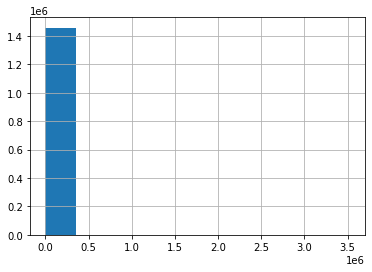

In [5]:
# Examine trip durations
# Create a histogram of trip durations
data['trip_duration'].hist()

In [6]:
# Investigate outliers in the trip duration column

# Let's extract the trips that last longer than 5 hours
print("5 hours in seconds:", 5 * 60 * 60)
threshold = 5 * 60 * 60

extremely_long_trips = data[data['trip_duration'] > threshold]
extremely_long_trips # They do look like mistakes

5 hours in seconds: 18000


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,84594
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,86149
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,86352
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,86236
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,N,85197
...,...,...,...,...,...,...,...,...,...,...,...
1455097,id2798196,2,2016-03-20 03:51:36,2016-03-21 00:00:00,2,-73.969299,40.757301,-73.870277,40.709808,N,72504
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,N,86233
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,N,85311
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,N,86314


In [ ]:
# Visualize outliers on a map using Folium
# install Folium
!pip install folium

In [7]:
import folium
folium.__version__

'0.11.0'

In [8]:
nyc = folium.Map(location=[40.7128, -74.0060],
                 zoom_start=10)
# location=[40.872, -73.903] is Lehman College
pickup = folium.Marker(location=[40.741, -74.008], popup="Pick-up Location")
pickup.add_to(nyc)

dropoff = folium.Marker(location=[40.714, -74.009], popup="Drop-off Location")
dropoff.add_to(nyc)
nyc

<AxesSubplot:>

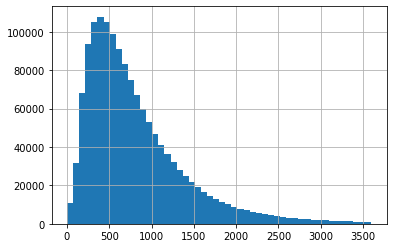

In [9]:
# Remove these outliers from the data set
threshold = 60 * 60 # 1 hour

data = data[~(data['trip_duration'] > threshold)]
# OR
# temp = data[data['trip_duration'] < threshold]
# OR
# temp = data.drop(extremely_long_trips.index)

data['trip_duration'].hist(bins=50)

In [10]:
# Also check those extremely short trips

threshold = 15 
extremely_short_trips = data[data['trip_duration'] < threshold]
extremely_short_trips

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
842,id3263580,2,2016-05-21 12:46:46,2016-05-21 12:46:49,2,-73.782372,40.648766,-73.782372,40.648746,N,3
1107,id0729156,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,N,2
1492,id2456838,1,2016-01-13 20:11:46,2016-01-13 20:11:53,1,-73.793442,40.644814,-73.795242,40.644669,N,7
1960,id0508736,1,2016-03-30 08:05:38,2016-03-30 08:05:41,1,-73.964096,40.777172,-73.964088,40.777157,N,3
2441,id2251007,2,2016-05-23 14:20:49,2016-05-23 14:20:57,1,-73.781830,40.644699,-73.781830,40.644699,N,8
...,...,...,...,...,...,...,...,...,...,...,...
1456442,id3241296,2,2016-02-11 08:01:28,2016-02-11 08:01:35,1,-73.978844,40.761787,-73.978951,40.761833,N,7
1456613,id2650432,1,2016-06-06 18:37:15,2016-06-06 18:37:24,1,-73.789665,40.646984,-73.789658,40.646976,N,9
1457121,id2651184,1,2016-04-03 07:24:06,2016-04-03 07:24:13,1,-73.913620,40.765675,-73.913620,40.765667,N,7
1457746,id1044471,2,2016-01-29 21:58:11,2016-01-29 21:58:23,1,-73.975708,40.733089,-73.975685,40.733101,N,12


In [11]:
nyc = folium.Map(location=[40.7128, -74.0060],
                 zoom_start=10)
# location=[40.872, -73.903] is Lehman College
ind = 1107
pickup_long = extremely_short_trips.loc[ind, 'pickup_longitude']
pickup_lat = extremely_short_trips.loc[ind, 'pickup_latitude']
dropoff_long = extremely_short_trips.loc[ind, 'dropoff_longitude']
dropoff_lat = extremely_short_trips.loc[ind, 'dropoff_latitude']

pickup = folium.Marker(location=[pickup_lat, pickup_long], popup="Pick-up Location")
pickup.add_to(nyc)

dropoff = folium.Marker(location=[dropoff_lat, dropoff_long], popup="Drop-off Location")
dropoff.add_to(nyc)
nyc

In [12]:
# Remove those extremely short trips

data = data[data['trip_duration'] >= threshold]
data.shape

(1443507, 11)

In [13]:
# Examine vender IDs: How many records does each vender have?

data['vendor_id'].value_counts()

2    771494
1    672013
Name: vendor_id, dtype: int64

Text(0.5, 1.0, 'Vendor ID: 2')

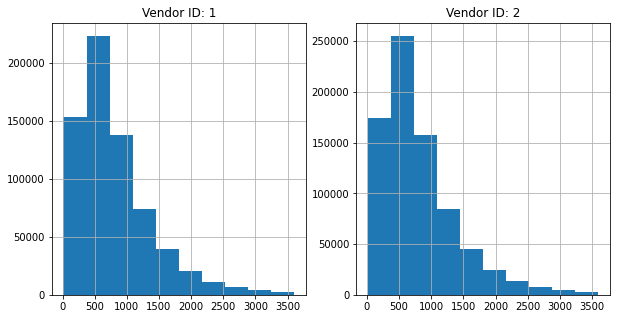

In [15]:
# Does it matter which vendor the record come from?
# Visualize the distribution of trip durations for record from each vendor.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
# Extract vendor 1 records
data_vendor1 = data[data['vendor_id'] == 1]
# data_vendor1.head()
data_vendor1['trip_duration'].hist(ax=ax1)
ax1.set_title("Vendor ID: 1")

# Create axes for the second plot
ax2 = fig.add_subplot(1, 2, 2)
# Extract vendor 2 records
data_vendor2 = data[data['vendor_id'] == 2]
# data_vendor2.head()
data_vendor2['trip_duration'].hist(ax=ax2)
ax2.set_title("Vendor ID: 2")

The vendor ID is not relevant to trip durations.

<AxesSubplot:>

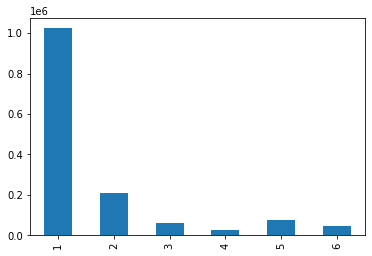

In [16]:
# Examine passenger counts

data['passenger_count'].value_counts().sort_index()

# Remove rows where the passenger count is 0 or grater than 6.
# Use bitwise or: | (bitwise and: &, bitwise not: ~)
data = data[(data['passenger_count'] > 0) & (data['passenger_count'] <= 6)]
data['passenger_count'].value_counts().sort_index().plot.bar()

In [ ]:
# Examine flags
# Left as homework


<AxesSubplot:>

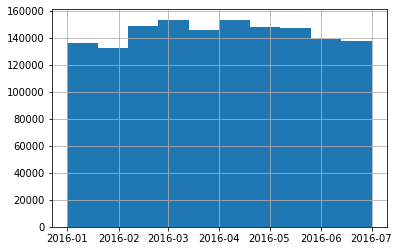

In [17]:
# Examine pick-up date and time.
data['pickup_datetime'].hist() # a direct histogram doesn't seem informational.

In [18]:
# Extract information from datetimes.
# Extract the hour, the month, and the day of week from date time.
data['Hour'] = data['pickup_datetime'].dt.hour
data['Month'] = data['pickup_datetime'].dt.month
data['DayOfWeek'] = data['pickup_datetime'].dt.dayofweek
data.head(20)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,DayOfWeek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,3,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,4,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,3,5
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,22,1,5
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,22,6,4
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,7,5,5
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,23,5,4
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,21,3,3


<AxesSubplot:>

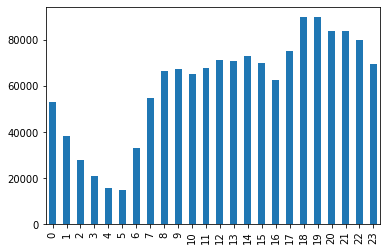

In [19]:
# Display the number of trips for each hour

data['Hour'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

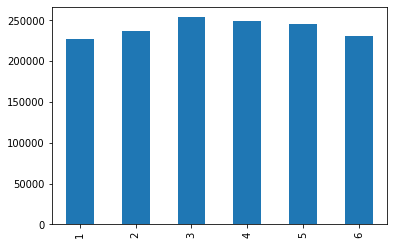

In [20]:
# Display the number of trips for each month

data['Month'].value_counts().sort_index().plot.bar()

In [ ]:
# Display the number of trips for each day of the week
# Left as homework


In [33]:
# Let's round the coordinates to the nearest 0.001

# How can we round a single value to the nearest 0.001?
temp = -73.982155
print(round(temp, 3))

# We need to apply this method to each value in the latitude column
def round_to_3_decimals(x):
    return round(x, 3)

print(round_to_3_decimals(temp))

# Apply the function:
data['pickup_latitude'] = data['pickup_latitude'].apply(round_to_3_decimals)
data['pickup_longitude'] = data['pickup_longitude'].apply(round_to_3_decimals)
data['dropoff_latitude'] = data['dropoff_latitude'].apply(round_to_3_decimals)
data['dropoff_longitude'] = data['dropoff_longitude'].apply(round_to_3_decimals)

data.head()

-73.982
-73.982


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,DayOfWeek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,17,3,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,11,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,19,4,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,13,3,5


In [34]:
# Find common pickup locations
pickups = data.groupby(['pickup_latitude','pickup_longitude'])['id'].count()
pickups.head()

pickup_latitude  pickup_longitude
34.360           -65.848             1
34.712           -75.354             1
35.082           -71.800             1
35.310           -72.074             1
36.029           -77.441             1
Name: id, dtype: int64

In [35]:
pickups.shape

(12690,)

In [41]:
# Convert the result to a data frame
pickups = pd.DataFrame(pickups)
pickups = pickups.reset_index()
pickups.head()

,pickup_latitude,pickup_longitude,id
0,34.360,-65.848,1
1,34.712,-75.354,1
2,35.082,-71.800,1
3,35.310,-72.074,1
4,36.029,-77.441,1


In [42]:
# from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap

pickup_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 10,)

hm_wide = HeatMap(list(zip(pickups['pickup_latitude'], 
                           pickups['pickup_longitude'],
                           pickups['id'])),
                  min_opacity = 0.2,
                  radius = 5, blur = 15,
                  max_zoom = 1)

pickup_map.add_child(hm_wide)

pickup_map

(40.5, 40.9)

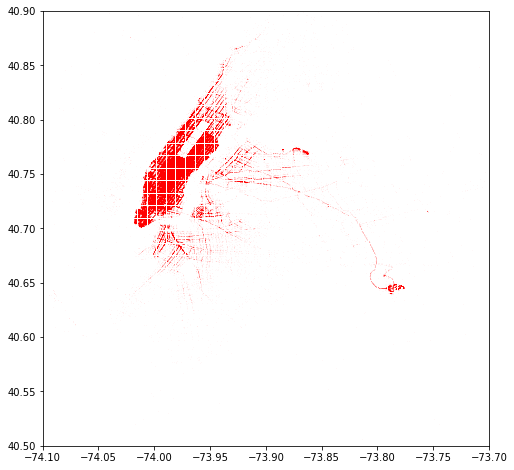

In [45]:
# Visualize the records using a scatter plot
plt.figure(figsize=(8, 8))
plt.plot(data['pickup_longitude'], data['pickup_latitude'],
         'r.',
         alpha=0.4,
         markersize=0.05)
plt.xlim([-74.1, -73.7])
plt.ylim([40.5, 40.9])

In [ ]:
# Visulize dropoff locations.
# left as homework.


# Examine the relationship
- Relationship of a single feature and the trip duration
- Create additional useful features
    - Distance between pick-up and drop-off
    - Hour of the day
    - Day of the week
    - Weekdays vs. weekends
    - Holidays?
    - Weather?
- Relationship of multiple features and the trip duration

<AxesSubplot:xlabel='Hour'>

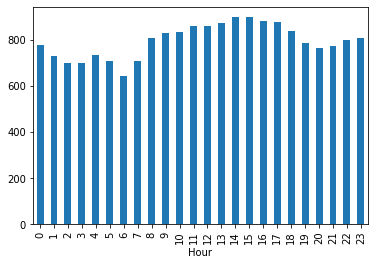

In [49]:
# which pickup / dropoff hours tend to give higher trip durations?

# Create a bar plot with hours on the x-axis, and the average trip duation
# on the y-axis.

avg_duration_by_hour = data.groupby('Hour')['trip_duration'].mean()
avg_duration_by_hour.plot.bar()

(0.0, 0.5)

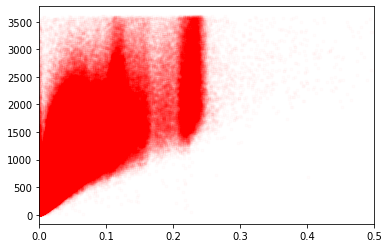

In [57]:
# Trip Duration vs Trip Distance？

# Draw a scatter plot with trip distance as x-axis and trip duration as 
# y-axis.

# For simplicity, assume that the trip distance is the distance between
# the pick up location and the drop off location.
# Distance = ((pickup_latitude - dropoff_latitude) ** 2 + 
#            (pickup_longitude - dropoff_longitude) ** 2) ** 0.5
data['Distance'] = ((data['pickup_latitude'] - data['dropoff_latitude']) ** 2 + \
       (data['pickup_longitude'] - data['dropoff_longitude']) ** 2) ** 0.5
# data.head()

plt.plot(data['Distance'], data['trip_duration'], 'r.', alpha=0.01)
plt.xlim([0, 0.5])

In [ ]:
# Is the trip duration higher on diffent days?
# Homework?

## Make Predictions

Suppose that I want to take a taxi from the Empire State Building to the JFK International Airport, how much time does it take?
- What additional information may be helpful for the prediction?
- Are there similar trips in the data set?
- How to make a reasonable prediction?

In [75]:
# Let's predict a trip from the Empire State Building to LGA.
# Pick up time: 12:40pm on Monday
# Empire state building: 40.7483531,-73.9881854
# LGA: 

# Idea: look for similar record in our data set.
# Criterion:
# 1. Hour == 12
# 2. DayOfWeek == 1
# 3. pickup_longitude == -73.987
# 4. pickup_latitude == 40.748
# 5. dropoff_longitude == -73.876
# 6. dropoff_latitude == 40.776

filter1 = (data["Hour"] == 12) & (data["DayOfWeek"] == 1) \
        & (data['pickup_longitude'] < -73.9) \
        & (data['pickup_longitude'] > -74.0) \
        & (data['pickup_latitude'] < 40.8) \
        & (data['pickup_latitude'] > 40.7) \
        & (data['dropoff_longitude'] < -73.8) \
        & (data['dropoff_longitude'] > -73.9) \
        & (data['dropoff_latitude'] < 40.8) \
        & (data['dropoff_latitude'] > 40.7)
print(data[filter1].shape)
data[filter1].head()

(177, 15)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,DayOfWeek,Distance
2885,id2271374,2,2016-05-17 12:41:06,2016-05-17 13:16:39,1,-73.978,40.763,-73.865,40.771,N,2133,12,5,1,0.113283
3886,id1981384,2,2016-06-21 12:02:00,2016-06-21 12:28:56,5,-73.987,40.734,-73.873,40.774,N,1616,12,6,1,0.120814
24746,id3139729,1,2016-01-19 12:28:59,2016-01-19 12:50:41,1,-73.973,40.762,-73.873,40.774,N,1302,12,1,1,0.100717
46554,id2673560,2,2016-05-17 12:43:24,2016-05-17 13:28:32,1,-73.978,40.762,-73.873,40.774,N,2708,12,5,1,0.105683
48279,id0219639,1,2016-04-26 12:00:52,2016-04-26 12:16:32,1,-73.954,40.771,-73.865,40.770,N,940,12,4,1,0.089006


In [76]:
# What is the average duration of these similar trips?
data[filter1]['trip_duration'].mean()

1597.4745762711864

In [77]:
1597 / 60

26.616666666666667